___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

In [1]:
pwd

'C:\\Users\\diego\\OneDrive - ITESO\\ITESO\\3 semestre\\Laboratorio de Modelado de Datos'

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 0.8240 - accuracy: 0.4507
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 0.8090 - accuracy: 0.4618
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 0.7945 - accuracy: 0.4655
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.7809 - accuracy: 0.4749
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7680 - accuracy: 0.4879
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7560 - accuracy: 0.4916
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7449 - accuracy: 0.4953
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7342 - accuracy: 0.5065
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7231 - accuracy: 0.5177
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7135 - accuracy: 0.5289
Epoch 11/200
6/6 [===========

Epoch 167/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4590 - accuracy: 0.7784
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4589 - accuracy: 0.7784
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4587 - accuracy: 0.7765
Epoch 170/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4585 - accuracy: 0.7765
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4583 - accuracy: 0.7765
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.7765
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4580 - accuracy: 0.7784
Epoch 174/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4578 - accuracy: 0.7765
Epoch 175/200
6/6 [==============================] - 0s 9ms/step - loss: 0.4577 - accuracy: 0.7765
Epoch 176/200
6/6 [==============================] - 0s 13ms/step - loss: 0.4575 - accuracy: 0.7784
Epoch 177

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

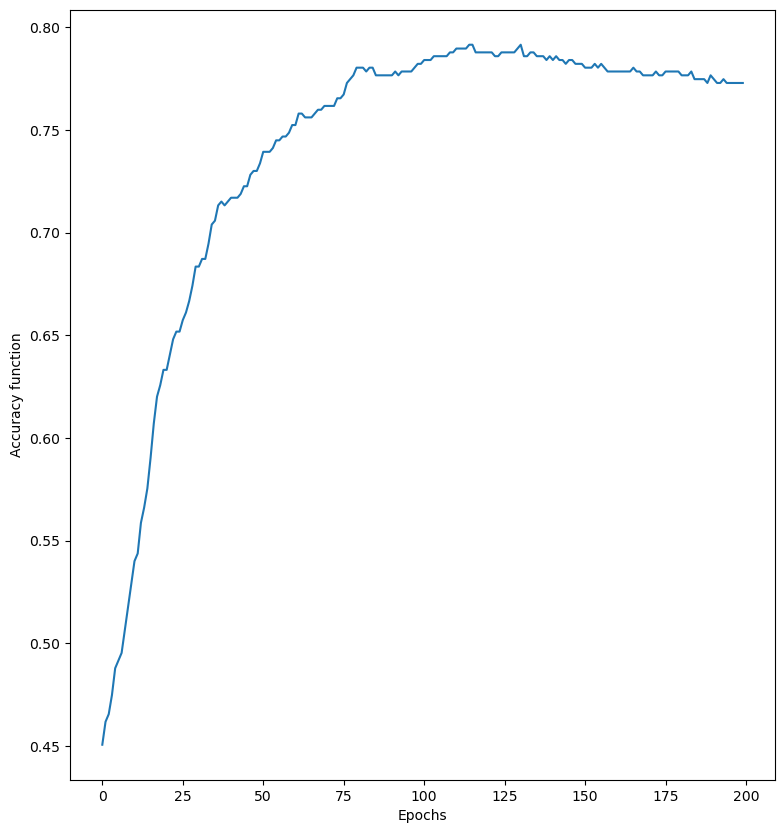

In [9]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 3ms/step


In [11]:
Y_pred

array([[0.29334205],
       [0.1146258 ],
       [0.14019386],
       [0.26917514],
       [0.5349418 ],
       [0.45006976],
       [0.03828019],
       [0.5955395 ],
       [0.60944927],
       [0.75939554],
       [0.22510092],
       [0.7956881 ],
       [0.48261595],
       [0.38058016],
       [0.06888784],
       [0.39436424],
       [0.08606648],
       [0.0718288 ],
       [0.73347545],
       [0.56428576],
       [0.2177742 ],
       [0.07498746],
       [0.3607106 ],
       [0.08346399],
       [0.59776556],
       [0.82224935],
       [0.08867768],
       [0.06275355],
       [0.21770985],
       [0.13159403],
       [0.8120269 ],
       [0.8394205 ],
       [0.78538454],
       [0.78622067],
       [0.6221444 ],
       [0.68328834],
       [0.67937666],
       [0.23668738],
       [0.4809404 ],
       [0.64250207],
       [0.06153418],
       [0.49909657],
       [0.4526722 ],
       [0.42896155],
       [0.07616509],
       [0.6452748 ],
       [0.6869115 ],
       [0.146

In [12]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [13]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 3ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.773 	 0.706 	 0.601
  Test 	 0.758 	 0.650 	 0.650


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [14]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [15]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [19]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [22]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 2s 1s/step - loss: 1.5453 - accuracy: 0.6083 - val_loss: 2.3964 - val_accuracy: 0.3000
Epoch 2/200
2/2 [==============================] - 0s 118ms/step - loss: 2.0355 - accuracy: 0.3417 - val_loss: 0.9264 - val_accuracy: 0.4667
Epoch 3/200
2/2 [==============================] - 0s 91ms/step - loss: 0.9292 - accuracy: 0.5250 - val_loss: 0.6538 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 2s 2s/step - loss: 0.6805 - accuracy: 0.6667 - val_loss: 0.5740 - val_accuracy: 0.9000
Epoch 5/200
2/2 [==============================] - 0s 236ms/step - loss: 0.5797 - accuracy: 0.8333 - val_loss: 0.4728 - val_accuracy: 0.7667
Epoch 6/200
2/2 [==============================] - 0s 314ms/step - loss: 0.4525 - accuracy: 0.7833 - val_loss: 0.7694 - val_accuracy: 0.6333
Epoch 7/200
2/2 [==============================] - 0s 253ms/step - loss: 0.6271 - accuracy: 0.6750 - val_loss: 0.5181 - val_accuracy: 0.7000
Epoch 8/200
2/2 [===

2/2 [==============================] - 0s 66ms/step - loss: 0.1018 - accuracy: 0.9500 - val_loss: 0.0982 - val_accuracy: 0.9667
Epoch 60/200
2/2 [==============================] - 0s 70ms/step - loss: 0.1040 - accuracy: 0.9667 - val_loss: 0.1257 - val_accuracy: 0.9000
Epoch 61/200
2/2 [==============================] - 0s 108ms/step - loss: 0.0841 - accuracy: 0.9667 - val_loss: 0.1466 - val_accuracy: 0.8667
Epoch 62/200
2/2 [==============================] - 0s 78ms/step - loss: 0.1058 - accuracy: 0.9417 - val_loss: 0.1731 - val_accuracy: 0.8667
Epoch 63/200
2/2 [==============================] - 0s 117ms/step - loss: 0.0989 - accuracy: 0.9500 - val_loss: 0.0861 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 81ms/step - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.0878 - val_accuracy: 0.9667
Epoch 65/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0891 - accuracy: 0.9750 - val_loss: 0.1739 - val_accuracy: 0.8667
Epoch 66/200
2/2 [======

Epoch 117/200
2/2 [==============================] - 0s 70ms/step - loss: 0.1069 - accuracy: 0.9583 - val_loss: 0.1929 - val_accuracy: 0.9000
Epoch 118/200
2/2 [==============================] - 0s 79ms/step - loss: 0.1778 - accuracy: 0.9333 - val_loss: 0.3379 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 82ms/step - loss: 0.1523 - accuracy: 0.9417 - val_loss: 0.1766 - val_accuracy: 0.9333
Epoch 120/200
2/2 [==============================] - 0s 78ms/step - loss: 0.1798 - accuracy: 0.9333 - val_loss: 0.1091 - val_accuracy: 0.9667
Epoch 121/200
2/2 [==============================] - 0s 101ms/step - loss: 0.1094 - accuracy: 0.9667 - val_loss: 0.2081 - val_accuracy: 0.8667
Epoch 122/200
2/2 [==============================] - 0s 96ms/step - loss: 0.1074 - accuracy: 0.9500 - val_loss: 0.0843 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 107ms/step - loss: 0.0697 - accuracy: 0.9833 - val_loss: 0.0729 - val_accuracy: 1.0000
Epoc

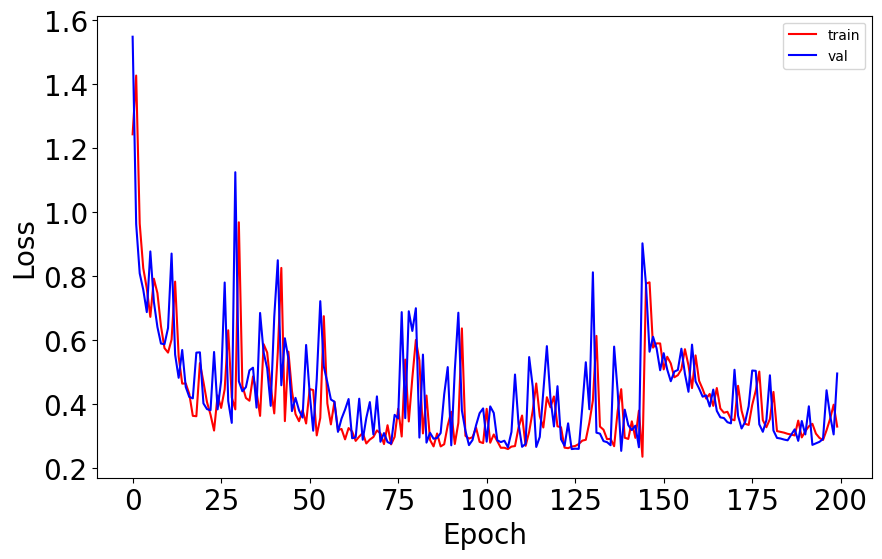

In [23]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [24]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 56ms/step


In [25]:
Y_pred

array([[3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [9.9990678e-01, 9.3258808e-05, 5.4217932e-14],
       [1.4532815e-09, 3.5872927e-04, 9.9964130e-01],
       [3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [9.9972957e-01, 2.7039330e-04, 6.3536839e-13],
       [3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [2.3891521e-03, 7.1950221e-01, 2.7810863e-01],
       [1.2286072e-02, 9.2996448e-01, 5.7749417e-02],
       [3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [4.1810214e-03, 8.1747383e-01, 1.7834519e-01],
       [9.9946159e-01, 5.3841394e-04, 2.3595926e-12],
       [9.9997330e-01, 2.6712058e-05, 1.7399890e-15],
       [9.9942797e-01, 5.7198532e-04, 2.9429827e-12],
       [9.9992025e-01, 7.9693673e-05, 4.0114677e-14],
       [3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [1.3783997e-06, 1.7683988e-02, 9.8231459e-01],
       [3.2262996e-02, 9.5080388e-01, 1.6933147e-02],
       [3.2262996e-02, 9.508

In [26]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [27]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [28]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 300ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.933 	 0.944 	 0.933
  Test 	 0.867 	 0.908 	 0.867
